## Analyse Factorielle des Correspondances

* L'AFC est une méthode statistuqe utilisée pour **explorer la relation entre 2 variables qualitatives**.


* **Principe** : représenter les fréquences des différentes modalités des deux variables dans un **tableau de contingence** + chercher les combinaisons linéaires de ces modalités qui expliquent le mieux l'association entre les 2 variables.


* Ces combinaisons linéaires sont appelées axes factoriels et sont construits de manière à maximiser la variance expliquée par chaque axe.

### Tableau de Contingence

Nous étudions deux variables qualitatives : la **couleur des voitures** (rouge, bleu, vert) et le **type de carburant** (essence, diesel, électrique).

* Echantillon : 100 voitures

In [48]:
import pandas as pd

# Tableau de contingence

colors     = ['Rouge', 'Bleu', 'Vert']
carburants = ['Essence', 'Diesel', 'Electrique']


data = [[20, 30, 10], [15, 25, 30], [5, 15, 10]]

tab  = pd.DataFrame(data, columns=carburants, index=colors)

print("== Tableau de Contingence ==")
print(tab)



== Tableau de Contingence ==
       Essence  Diesel  Electrique
Rouge       20      30          10
Bleu        15      25          30
Vert         5      15          10


### Réalisation de l'AFC (Analyse Factorielle des Correspondances)

1. Création du tableau de contingence


2. Analyse factorielle : ``FactorAnalysis``

L'analyse factorielle **regroupe les variables en clusters qui ont des corrélations élevées entre elles**. Les factuers sont des CL des vairables observées qui maximisent leur variance expliquée.


3. Création de deux composantes principales (``n_components = 2``)


4. Ajustement du modèle aux données : ``fit()``


5. Affichage des résultats



In [49]:
from sklearn.decomposition import FactorAnalysis


data = {'Essence': [20, 15, 5], 'Diesel': [30, 25, 15], 'Electrique': [10, 30, 10]}
df = pd.DataFrame(data, index=['Rouge', 'Bleu', 'Vert'])

# AFC
model = FactorAnalysis(n_components=2)
model.fit(df)

# Affichage

print("Composantes principales : ")
print(model.components_)


Composantes principales : 
[[-6.23609564e+00 -6.23609564e+00 -1.78174161e+00]
 [-1.31485696e-12 -1.31487294e-12  9.20403638e+00]]


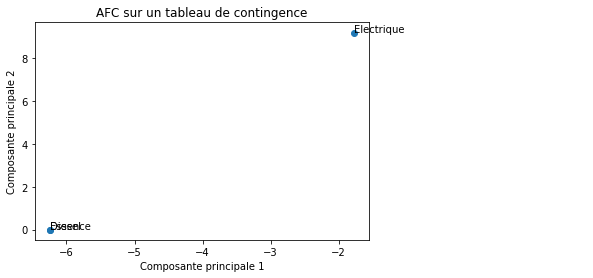

In [50]:
import matplotlib.pyplot as plt

# Affichage graphique

fig, ax = plt.subplots()
ax.scatter(model.components_[0], model.components_[1])
for i, txt in enumerate(carburants):
    ax.annotate(txt, (model.components_[0,i], model.components_[1,i]))
for i, txt in enumerate(colors):
    ax.annotate(txt, (model.transform(tab)[i,0], model.transform(tab)[i,1]))
    
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("AFC sur un tableau de contingence")
plt.show()

* La première composante principale représente une opposition entre les voitures fonctionnant à l'essence et celles fonctionnant au diesel et à l'électricité


* La deuxième composante principale représente une opposition entre les voitures diesel et électriques.

In [53]:
import numpy as np

# Matrice de données
X = np.array([[20, 30, 10],
              [15, 25, 30],
              [5, 15, 10]])

# Calcul de la matrice de covariance
cov = np.cov(X.T)

# Calcul des valeurs propres et vecteurs propres de la matrice de covariance
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(eigenvalues)

print(np.sum(eigenvalues))


# Variance expliquée par chaque composante principale
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("Variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

[-1.42108547e-14  1.00000000e+02  1.50000000e+02]
250.00000000000003
Variance expliquée par chaque composante principale :
[-5.68434189e-17  4.00000000e-01  6.00000000e-01]


La variance expliquée par une composante principale est égale à **sa valeur propre divisée par la somme des valeurs propres de toutes les composantes principales.** 

## Analyse des Correspondances Multiples (ACM)

* l'ACM est utilisée pour explorer la structure d'un tableau de données contenant des variables qualitatives (+ de 2 e.g.)


* **Principe** : trouver des relations entre les différentes modalités des variables qualitatives étudiées


* l'ACM permet réduit la dimensionnalité du tableau de données en projetant les observations sur un espace de dimension réduite



* **Etapes** : 
    1. Tableau de contingence (fréquence de chaque modalité pour chaque variable)
    2. Calcul d'une matrice de similarité entre les variables en utilisant une messure de corrélation appropriée
    3. Application d'une ACP

### Exemple

* **Jeu de données**: informations sur les passagers du Titanic, notamment leur sexe, leur âge, leur classe de voyage et leur survie.


* **Objectif** : vérifier l'existence de relations entre les préférences musicales & les autres variables

In [75]:
import pandas as pd

titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [83]:
# Sélectionner les variables catégorielles pour l'ACM
X = titanic[['Sex', 'Age', 'Pclass', 'Survived']].dropna()

# Transformer les variables en variables catégorielles
X['Sex'] = X['Sex'].astype('category')
X['Pclass'] = X['Pclass'].astype('category')
X['Survived'] = X['Survived'].astype('category')

print(X)

        Sex   Age Pclass Survived
0      male  22.0      3        0
1    female  38.0      1        1
2    female  26.0      3        1
3    female  35.0      1        1
4      male  35.0      3        0
..      ...   ...    ...      ...
882    male  27.0      2        0
883  female  19.0      1        1
884  female   7.0      3        0
885    male  26.0      1        1
886    male  32.0      3        0

[887 rows x 4 columns]


In [84]:
# Sélection des variables carégorielles pour l'ACM

X = titanic[['Sex', 'Age', 'Pclass', 'Survived']].dropna()

# Transformer les variables en variables catégorielles
X['Sex']      = X['Sex'].astype('category')
X['Pclass']   = X['Pclass'].astype('category')
X['Survived'] = X['Survived'].astype('category')

print(X)

        Sex   Age Pclass Survived
0      male  22.0      3        0
1    female  38.0      1        1
2    female  26.0      3        1
3    female  35.0      1        1
4      male  35.0      3        0
..      ...   ...    ...      ...
882    male  27.0      2        0
883  female  19.0      1        1
884  female   7.0      3        0
885    male  26.0      1        1
886    male  32.0      3        0

[887 rows x 4 columns]


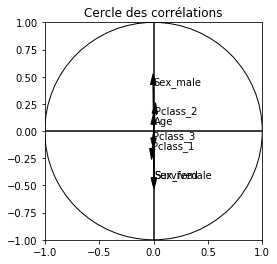

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA


# ACM

# Encodage des variables catégorielles

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,3])], remainder='passthrough')
X = ct.fit_transform(X)


# ACP

pca = PCA(n_components = 2)
XPCA = pca.fit_transform(X)


# Affichage

# Créer le cercle des corrélations
corr_circle = plt.Circle((0, 0), 1, fill=False)

# Afficher le graphique avec le cercle des corrélations
fig, ax = plt.subplots()
ax.add_artist(corr_circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', adjustable='box')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Ajouter les variables au graphique
for i, var in enumerate(['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'Survived']):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.annotate(var, (pca.components_[0, i], pca.components_[1, i]))

plt.title('Cercle des corrélations')
plt.show()